In [ ]:
# MANDENGS CHRISTOPHER ISTIFANUS, ISU:- 486554

ROBOT MOTION PLANNING AND CONTROL - LAB3 TASK CODE ATTEMPT4

METHOD - Potential Field Path Planning Method

Goal reached.
Planned Path:
x: 10.00, y: 10.00
x: 10.01, y: 10.01
x: 10.01, y: 10.01
x: 10.02, y: 10.02
x: 10.03, y: 10.03
x: 10.04, y: 10.04
x: 10.04, y: 10.04
x: 10.05, y: 10.05
x: 10.06, y: 10.06
x: 10.06, y: 10.06
x: 10.07, y: 10.07
x: 10.08, y: 10.08
x: 10.08, y: 10.08
x: 10.09, y: 10.09
x: 10.10, y: 10.10
x: 10.11, y: 10.11
x: 10.11, y: 10.11
x: 10.12, y: 10.12
x: 10.13, y: 10.13
x: 10.13, y: 10.13
x: 10.14, y: 10.14
x: 10.15, y: 10.15
x: 10.16, y: 10.16
x: 10.16, y: 10.16
x: 10.17, y: 10.17
x: 10.18, y: 10.18
x: 10.18, y: 10.18
x: 10.19, y: 10.19
x: 10.20, y: 10.20
x: 10.21, y: 10.21
x: 10.21, y: 10.21
x: 10.22, y: 10.22
x: 10.23, y: 10.23
x: 10.23, y: 10.23
x: 10.24, y: 10.24
x: 10.25, y: 10.25
x: 10.25, y: 10.25
x: 10.26, y: 10.26
x: 10.27, y: 10.27
x: 10.28, y: 10.28
x: 10.28, y: 10.28
x: 10.29, y: 10.29
x: 10.30, y: 10.30
x: 10.30, y: 10.30
x: 10.31, y: 10.31
x: 10.32, y: 10.32
x: 10.33, y: 10.33
x: 10.33, y: 10.33
x: 10.34, y: 10.34
x: 10.35, y: 10.35
x: 10.35, y: 10.35
x: 

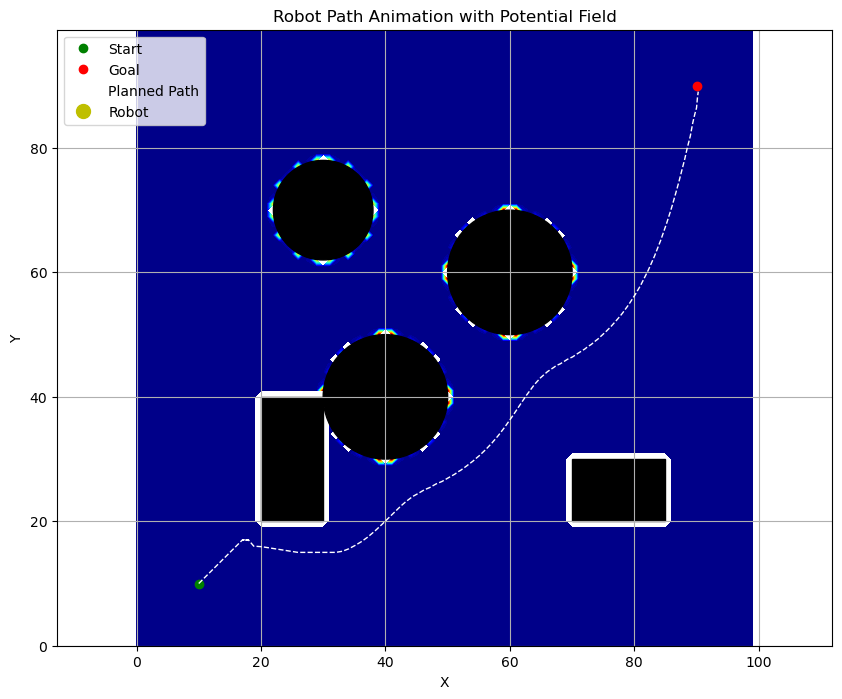

In [ ]:
# IMPORTING DEPENDENCIES (NDYA'AM MMA NGHA SI KIR NDHAMMI TA MASAI WUNAT A TUTI PYTHON)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import csv
from PIL import Image

# Grid setup (NGHA MMA HAYAY MMA FHANG MATERILA NGHA SI MUN)
X, Y = np.meshgrid(np.arange(0, 100), np.arange(0, 100))

# Start and Goal (KIL MMA BWAOI KA KIL MMA WALAYI)
start = np.array([10.0, 10.0])
goal = np.array([90.0, 90.0])

# Obstacles (MMA SHIT TI NDHAAM MMA FANG MATERI LLA)
obstacles = [
    ("circle", (40, 40, 10)),
    ("circle", (60, 60, 10)),
    ("circle", (30, 70, 8)),
    ("rectangle", (20, 20, 10, 20)),
    ("rectangle", (70, 20, 15, 10)),
]

# Potential functions (MMA BGYAM TI ROBOT A KIL MA MMA CHA FUKI)
def attractive_potential(x, y, goal, k_att=1.0): # ATTRACTIVE POTENTIAL - PULLS THE ROBOT TOWARDS THE GOAL
    return 0.5 * k_att * ((x - goal[0])**2 + (y - goal[1])**2)

# TUK ROBOT LLA TAA KIL MMA NDYAM MMA FANG MATER LLA)
def repulsive_potential(x, y, obstacles, k_rep=10000.0, Q_star=200.0): # REPULSIVE POTENTIAL - PUSHES THE ROBOT AWAY FROM THE OBSTACLES - (INCREASE K_REP AND Q_STAR FOR BETTER OBSTATCLE AVOIDANCE)
    U_rep = np.zeros_like(x, dtype=float)
    for typ, obs in obstacles:
        if typ == "circle":
            ox, oy, r = obs
            d = np.sqrt((x - ox)**2 + (y - oy)**2) - r
        elif typ == "rectangle":
            rx, ry, w, h = obs
            dx = np.maximum(np.maximum(rx - x, 0), x - (rx + w))
            dy = np.maximum(np.maximum(ry - y, 0), y - (ry + h))
            d = np.sqrt(dx**2 + dy**2)
        else:
            continue
        mask = d <= Q_star
        with np.errstate(divide='ignore', invalid='ignore'):
            U_rep[mask] += 0.5 * k_rep * ((1.0 / d[mask] - 1.0 / Q_star)**2)
    return U_rep

# TOTAL Potentials - DEFIENS THE TOTAL ENERGY LANDSCAPE THAT COMBINES ATTRACTIVE POTENTIAL + REPULSIVE POTENTIAL
U_att = attractive_potential(X, Y, goal)
U_rep = repulsive_potential(X, Y, obstacles)
U_total = U_att + U_rep

# Gradient
gy, gx = np.gradient(-U_total) # THE GRADIENT OF THE TOTAL POTENTIAL DEFINES THE DIRECTION OF MOTION OF THE ROBOT

# Path planning parameters (NGHA MMA NGHA TA HAT MAWAN A KIL MA MMA CHA FUKI)
alpha = 0.01  # step size - smaller step_size for better avoidance
epsilon = 1e-4
max_steps = 500000 # maximum steps to reach the goal

path = [start.copy()]
current = start.copy()

for _ in range(max_steps):
    if np.any(np.isnan(current)) or np.any(current < 0) or current[0] >= gx.shape[1] or current[1] >= gx.shape[0]:
        print("Path terminated due to invalid robot position.")
        break

    ix, iy = int(current[0]), int(current[1])
    dx, dy = gx[iy, ix], gy[iy, ix]
    grad = np.array([dx, dy])
    norm = np.linalg.norm(grad)

    if norm < epsilon:
        print("Gradient too small, robot stopped.")
        break

    step = alpha * grad / norm
    current = current + step
    path.append(current.copy())

    if np.linalg.norm(current - goal) < 1.0:
        print("Goal reached.")
        break

path = np.array(path)
# Print Path AS PLANNED
print("Planned Path:")
for point in path:
    print(f"x: {point[0]:.2f}, y: {point[1]:.2f}")

# Save to CSV
with open("potential_field_path.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["x", "y"])
    writer.writerows(path)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Robot Path Animation with Potential Field")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.contourf(X, Y, U_total, levels=50, cmap='jet')

# Obstacles DEFINITION/SPEC
for typ, obs in obstacles:
    if typ == "circle":
        ox, oy, r = obs
        circle = plt.Circle((ox, oy), r, color='black', fill=True)
        ax.add_patch(circle)
    elif typ == "rectangle":
        rx, ry, w, h = obs
        rect = plt.Rectangle((rx, ry), w, h, color='black', fill=True)
        ax.add_patch(rect)

ax.plot(start[0], start[1], 'go', label='Start')
ax.plot(goal[0], goal[1], 'ro', label='Goal')
ax.plot(path[:, 0], path[:, 1], 'w--', linewidth=1, label='Planned Path')

# Robot animation
robot_dot, = ax.plot([], [], 'yo', markersize=10, label='Robot')

def init():
    robot_dot.set_data([], [])
    return robot_dot,

def update(frame):
    robot_dot.set_data(path[frame][0], path[frame][1])
    return robot_dot,

ani = animation.FuncAnimation(
    fig, update, frames=len(path), init_func=init, blit=True, interval=50, repeat=False
)

plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()
